# Getting Started with PyTorch

PyTorch is a widely-used Python library for deep learning. In this notebook, we'll cover the essentials of getting started with PyTorch:

1. [Installing PyTorch](#part-1-installation)

2. [Basic Data Structures](#part-2-basic-structures)

3. [Training a Model](#part-3-training-a-model)

4. [Performing inference with the model](#part-4-performing-inference)

5. [Saving and Loading Models](#part-5-saving-and-loading-models)


In this notebook, we'll install PyTorch, explore basic data structures, and train our first model. We'll show how you can use the model to make inferences on new data. Finally, we'll show how trained models can be saved and loaded to files.

By the end, you'll have a solid foundation in PyTorch and be ready to apply it to your own projects.

## Part 1: Installation

Ensure you have a virtual environment active. Then, run the following cell to install `torch` and `matplotlib`.

In [77]:
# Run this cell to install pip requirements.
!pip install torch matplotlib

## Part 2: Basic Structures

In this section, we will:

1. Import required packages.
1. Create some tensors.
1. Perform basic tensor operations.
1. Demo Automatic Differentiation.
1. Discuss moving to GPU.

### Importing PyTorch

In [78]:
import torch
print(torch.__version__)

2.4.0+cu121


### Creating a Tensor

In [79]:
# Create a 1D tensor (vector)
tensor = torch.tensor([1, 2, 3, 4, 5])
print(tensor)

# Create a 2D tensor (matrix)
tensor_2d = torch.tensor([[1, 2], [3, 4]])
print(tensor_2d)

tensor([1, 2, 3, 4, 5])
tensor([[1, 2],
        [3, 4]])


### Basic Operations

In [80]:
# Element-wise addition
tensor_add = tensor + 2
print(tensor_add)

# Element-wise multiplication
tensor_mul = tensor * 2
print(tensor_mul)

# Matrix multiplication
matrix_mul = torch.matmul(tensor_2d, tensor_2d)
print(matrix_mul)

tensor([3, 4, 5, 6, 7])
tensor([ 2,  4,  6,  8, 10])
tensor([[ 7, 10],
        [15, 22]])


### Automatic Differentiation

Tensorflow has a built-in way to compute the differential of a given point. For example, given this equation:

$$
y = x^2 + 3x + 1
$$

We know from calculus class that the derivative is:

$$
y' = 2x + 3
$$

Tensorflow can figure this out for a specific point. Take $7$ as an example.

- Original function: $2^2 + 3*2 + 1 = 4 + 6 + 1 = 11$
- Derivative: $2*2 + 3 = 7$

Using `requires_grad=True`, we can run `y.backward()` and check to see if the gradient matches our calculations.

In [81]:
# Create a tensor with requires_grad=True to track operations on it.
x = torch.tensor(2.0, requires_grad=True)

# Use the tensor for computation.
y = x**2 + 3*x + 1

print(f"Original function: {y}")

# Compute gradients. This sets the `x.grad` field but does not change `y`.
y.backward()

# Print the gradient (dy/dx)
print(f"Gradient: {x.grad}")

Original function: 11.0
Gradient: 7.0


### Moving Tensors to GPU

In [82]:
if torch.cuda.is_available():
    tensor_gpu = tensor.to('cuda')
    print(tensor_gpu)
else:
    print("GPU not available.")

GPU not available.


## Part 3: Training a Model

Overview of steps:

1. Create example dataset.
1. Define a linear model: $y=Wx+b$.
   - $W$ is the weight.
   - $b$ is the bias.
1. Train the model using training data. The model adjusts $W$ and $b$ to minimize the loss function.
1. Perform inference with the trained model. Given an arbitrary input, use the model to predict the outputs.

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 1. Create Example Dataset

In [84]:
# Generate some example data.
# Data will match the following function outputs: y = 2 * x + 1.
# In a real-world scenario, this data could come from measurements or other sources.
X = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

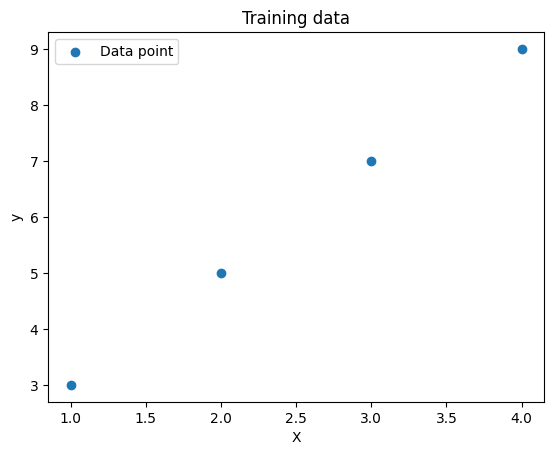

In [85]:
# Plot the data.
plt.scatter(X.numpy(), y.numpy(), label="Data point")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training data")
plt.legend()
plt.show()

### 2. Define a Linear Model 

In [86]:
# Define a simple linear model.
# The model we're defining is a linear model, which means it tries to fit a straight line to the data.
# `nn.Linear` creates a linear transformation, essentially computing y = Wx + b, where W is the weight and b is the bias.
model = nn.Linear(in_features=1, out_features=1)

In [87]:
# Define loss function, optimizer
# The loss function measures how well the model's predictions match the true outputs (y).
# In this case, we use Mean Squared Error (MSE), which is a common loss function for regression problems.
loss_fn = nn.MSELoss()

# The optimizer is responsible for updating the model's weights based on the gradients computed during backpropagation.
# Here, we're using Stochastic Gradient Descent (SGD), a simple and widely used optimization algorithm.
optimizer = optim.SGD(model.parameters(), lr=0.01)

### 3. Train the Model

In [88]:
# Now we enter the training loop, where we repeatedly adjust the model's parameters to minimize the loss.
epochs = 1000  # Number of times we will go through the entire dataset
loss_values = []  # List to store loss values for plotting later

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing X to the model.
    # (why is it called a forward pass?)
    # The model applies its current weights and bias to the inputs (X) to produce predictions (y_pred).
    y_pred = model(X)
    
    # Compute the loss.
    # The loss function compares the model's predictions (y_pred) with the true outputs (y) and returns a value indicating how far off the predictions are.
    loss = loss_fn(y_pred, y)
    
    # Save the loss so that we can plot it.
    loss_values.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    # `optimizer.zero_grad()` clears old gradients from the previous step (otherwise they would accumulate).
    # (what are gradients? what is a backward pass?)
    optimizer.zero_grad()
    
    # `loss.backward()` computes the gradient of the loss with respect to the model's parameters (weights and bias).
    # This is the "backward pass" and is part of the backpropagation algorithm.
    loss.backward()

    # `optimizer.step()` updates the model's parameters using the gradients computed in the backward pass.
    # This is where the actual learning happens, as the model adjusts its weights to reduce the loss.
    optimizer.step()

    # Print the loss every 100 epochs.
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 100/1000, Loss: 0.0038894820027053356
Epoch 200/1000, Loss: 0.0021352844778448343
Epoch 300/1000, Loss: 0.0011722565395757556
Epoch 400/1000, Loss: 0.0006435519317165017
Epoch 500/1000, Loss: 0.00035330691025592387
Epoch 600/1000, Loss: 0.00019396796415094286
Epoch 700/1000, Loss: 0.00010648653551470488
Epoch 800/1000, Loss: 5.846282510901801e-05
Epoch 900/1000, Loss: 3.209506394341588e-05
Epoch 1000/1000, Loss: 1.761888779583387e-05


## Part 4: Performing Inference

In [89]:
# Perform inference for a single point.

with torch.no_grad():  # Disable gradient calcualtion for inference.
    new_X = torch.tensor([[5.0]])  # Example input
    predicted_y = model(new_X)
    print(f"Predicted y for input 5.0: {predicted_y.item()}")

Predicted y for input 5.0: 10.992825508117676


In [90]:
# Perform inference for the entire original X domain.
with torch.no_grad():
    y_pred = model(X)

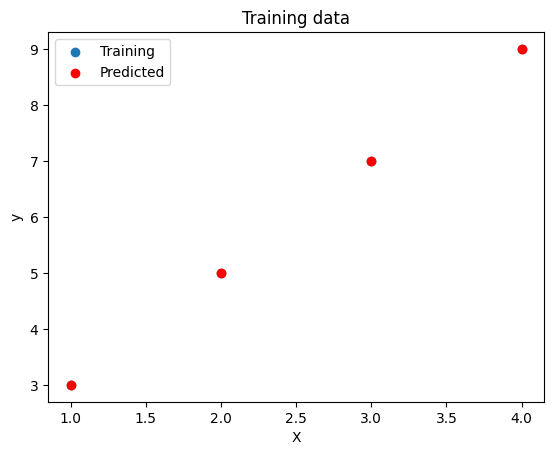

In [91]:
# Plot results against original training data.
plt.scatter(X.numpy(), y.numpy(), label="Training")
plt.scatter(X.numpy(), y_pred.numpy(), label="Predicted", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training data")
plt.legend()
plt.show()

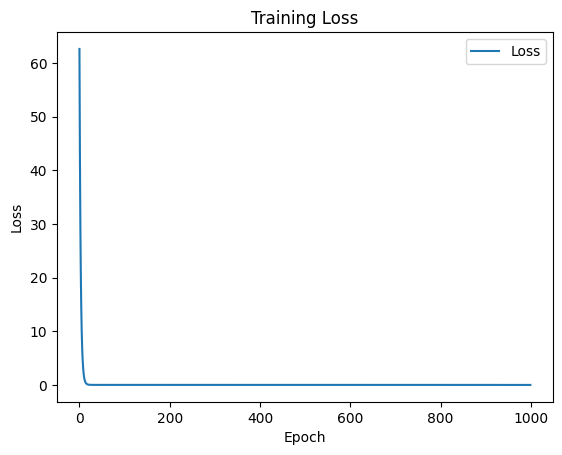

[62.64255142211914, 43.46845245361328, 30.1639404296875, 20.932209014892578, 14.526493072509766, 10.081689834594727, 6.997523307800293, 4.857471466064453, 3.372523784637451, 2.3421382904052734]


In [92]:
# Plot loss over epochs.
plt.plot(range(epochs), loss_values, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.show()
print(loss_values[0:10])

## Part 5: Saving and Loading Models

You have two options:

- Save Model State *Only* (Weights and Biases):
  - This is generally the preferred approach.
  - Flexible and portable. Common when collaborating or using a model in production.
  - Must redefine model architecture to load.
- Save the entire model (including architecture).
  - Easier to use - no need to define architecture to load.
  - Avoids human error (redefining complex architectures).
  - More convenient for experimenting / prototyping phases.

In our case, "redefining the architecture" would be as simple as instantiating the Linear model again. For more complex models, this would require re-defining all layers and configuration.

### Method 1: Saving the Model State

In [93]:
# TODO

### Method 2: Saving / Loading Entire Model

In [94]:
# TODO

## Conclusion

Thanks for checking out this notebook! I hope it helped you learn something new.